Langkah 1 — Import library 

In [1]:
# Langkah 1: imports dan setup
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# imbalanced-learn (SMOTE + pipeline)
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
except Exception:
    import sys
    !{sys.executable} -m pip install -q imbalanced-learn
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline

print("Libraries ready")


Libraries ready


Langkah 2 — Load dataset

In [8]:
# Langkah 2: Load & inspect
url = 'https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv'
df = pd.read_csv(url)

df.head()


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,...,No,3,33,0,4,1,3,44,3,No


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [10]:
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [12]:
df.isna().sum() 



Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [13]:
print("\nUnique counts for Attrition:")
print(df['Attrition'].value_counts())


Unique counts for Attrition:
Attrition
No     811
Yes    189
Name: count, dtype: int64


Langkah 3 — Preprocessing awal: drop ID dan ubah target jadi biner

In [14]:
# Langkah 3: drop identifier & target map
if 'Employee_ID' in df.columns:
    df = df.drop(columns=['Employee_ID'])

# Map Attrition -> 1 for Yes, 0 for No
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
print("Attrition value counts:\n", df['Attrition'].value_counts())


Attrition value counts:
 Attrition
0    811
1    189
Name: count, dtype: int64


Langkah 4 — Identifikasi kolom numerik & kategorikal, cek missing

In [15]:
# Langkah 4: kolom numeric vs categorical
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# keluarkan target dari daftar
if 'Attrition' in numeric_cols:
    numeric_cols.remove('Attrition')
if 'Attrition' in cat_cols:
    cat_cols.remove('Attrition')

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)
print("\nMissing total:", df.isna().sum().sum())

# Simple imputation jika ada missing
for c in numeric_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)
for c in cat_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].mode()[0], inplace=True)


Numeric cols: ['Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']
Categorical cols: ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime']

Missing total: 0


Langkah 5 — Tentukan ordinal & nominal (mapping)

In [16]:
# Langkah 5: contoh identifikasi ordinal (sesuaikan bila dataset berbeda)
# Jika kolom ordinal sudah numeric (1-5), tidak perlu encode ord secara manual.
possible_ordinals = ['Work_Life_Balance','Job_Satisfaction','Performance_Rating',
                     'Work_Environment_Satisfaction','Relationship_with_Manager','Job_Involvement']

ordinal_cols = [c for c in possible_ordinals if c in df.columns and df[c].dtype == 'object']
# jika tidak ada yang object, ordinal_cols mungkin kosong (karena numeric)
nominal_cols = [c for c in cat_cols if c not in ordinal_cols]

print("Ordinal (string) detected:", ordinal_cols)
print("Nominal cols:", nominal_cols)


Ordinal (string) detected: []
Nominal cols: ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime']


ordinal_cols = [] → tidak ada encoding ordinal tambahan.
nominal_cols = ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'] → akan di-OneHotEncode.

Langkah 6 — Bikin ColumnTransformer untuk preprocessing


In [19]:
# Langkah 6: Preprocessor (versi baru sklearn ≥1.4)
transformers = []
if ordinal_cols:
    transformers.append(('ord', OrdinalEncoder(), ordinal_cols))
if nominal_cols:
    transformers.append(('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')
print("Preprocessor built with transformers:", transformers)


Preprocessor built with transformers: [('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'])]


Langkah 7 — Train-test split (STRATIFIED)

In [20]:
# Langkah 7: train-test split
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distrib:\n", y_train.value_counts(normalize=True))
print("Test class distrib:\n", y_test.value_counts(normalize=True))


Train shape: (750, 24) Test shape: (250, 24)
Train class distrib:
 Attrition
0    0.810667
1    0.189333
Name: proportion, dtype: float64
Test class distrib:
 Attrition
0    0.812
1    0.188
Name: proportion, dtype: float64


Langkah 8 — Baseline Decision Tree (tanpa SMOTE)

In [21]:
# Langkah 8: baseline pipeline (preprocessing -> DecisionTree)
baseline_pipe = Pipeline(steps=[('pre', preprocessor),
                                ('clf', DecisionTreeClassifier(random_state=42))])

baseline_pipe.fit(X_train, y_train)

y_pred_test_baseline = baseline_pipe.predict(X_test)
print("Baseline Test Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_baseline))
print("Precision:", precision_score(y_test, y_pred_test_baseline, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_test_baseline, zero_division=0))
print("F1:", f1_score(y_test, y_pred_test_baseline, zero_division=0))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_baseline, digits=4))


Baseline Test Metrics:
Accuracy: 0.588
Precision: 0.12162162162162163
Recall: 0.19148936170212766
F1: 0.1487603305785124

Classification Report:
               precision    recall  f1-score   support

           0     0.7841    0.6798    0.7282       203
           1     0.1216    0.1915    0.1488        47

    accuracy                         0.5880       250
   macro avg     0.4529    0.4356    0.4385       250
weighted avg     0.6595    0.5880    0.6193       250



Langkah 9 — Cek imbalance & alasan pakai SMOTE

In [22]:
# Langkah 9: cek imbalance
print("Train class counts:\n", y_train.value_counts())
minority_pct = y_train.value_counts(normalize=True).min()
print(f"Minority class proportion (train): {minority_pct:.3f}")

# Catatan:
# - Jika minority_pct < ~0.4, biasanya imbalance perlu ditangani.
# - SMOTE adalah oversampling sintetis (bukan duplikasi).


Train class counts:
 Attrition
0    608
1    142
Name: count, dtype: int64
Minority class proportion (train): 0.189


Interpretasi:
Kelas 0 (Attrition = No) → 608 karyawan tidak keluar dari perusahaan.
Kelas 1 (Attrition = Yes) → hanya 142 karyawan keluar dari perusahaan.
Proporsi kelas minoritas = 0.189 (18.9%) → artinya hanya 19% data training adalah karyawan yang keluar.
Kesimpulan:
Ini adalah kasus imbalanced classification problem karena salah satu kelas jauh lebih sedikit.
Jika dibiarkan, model seperti Decision Tree bisa “malas” dan hanya menebak mayoritas (No) untuk mendapat akurasi tinggi tetapi gagal mendeteksi Attrition = Yes (karyawan yang keluar).

Langkah 10: Pipeline SMOTE + GridSearchCV

In [23]:
# Langkah 10: Pipeline SMOTE + GridSearchCV

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Buat pipeline: preprocessing -> SMOTE -> DecisionTree
imb_pipeline = ImbPipeline(steps=[
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Grid parameter Decision Tree
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# StratifiedKFold menjaga proporsi kelas tetap sama di tiap fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV dengan scoring F1 (lebih cocok untuk data imbalance)
grid = GridSearchCV(imb_pipeline,
                    param_grid=param_grid,
                    cv=cv,
                    scoring='f1',
                    n_jobs=-1,
                    verbose=1)

# Fit model
grid.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best CV F1 Score: 0.23804904066136118


SMOTE berhasil diterapkan lewat pipeline (ImbPipeline).
GridSearchCV menemukan kombinasi terbaik untuk Decision Tree (entropy, max_depth=3).
Model sederhana dengan F1-score CV sekitar 0.238

Langkah 11: Evaluasi akhir - tuned model vs baseline

=== Tuned Decision Tree (with SMOTE) ===
Train Accuracy: 0.5226666666666666
Test Accuracy: 0.452
Precision: 0.18309859154929578
Recall: 0.5531914893617021
F1-score: 0.2751322751322751

Classification Report (Test):
               precision    recall  f1-score   support

           0     0.8056    0.4286    0.5595       203
           1     0.1831    0.5532    0.2751        47

    accuracy                         0.4520       250
   macro avg     0.4943    0.4909    0.4173       250
weighted avg     0.6885    0.4520    0.5060       250


=== Baseline Decision Tree (No SMOTE) ===
Test Accuracy: 0.588
Precision: 0.12162162162162163
Recall: 0.19148936170212766
F1-score: 0.1487603305785124

Confusion Matrix (Tuned Model - Test Set):
 [[ 87 116]
 [ 21  26]]

F1 Baseline: 0.1488 | F1 Tuned (with SMOTE): 0.2751


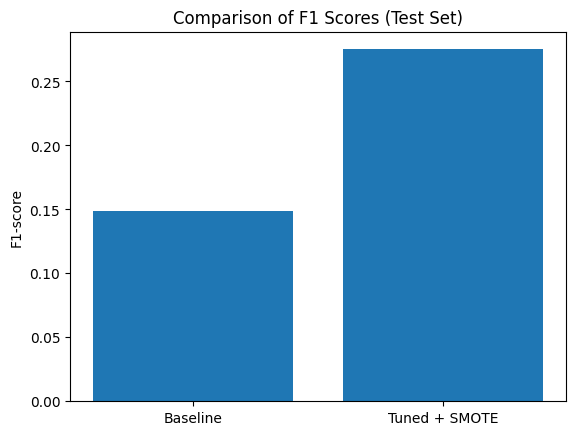

In [24]:
# Langkah 11: Evaluasi akhir - tuned model vs baseline

# Model terbaik hasil GridSearchCV (sudah termasuk preprocessing + SMOTE)
best_model = grid.best_estimator_

# Prediksi pada data test
y_pred_test_best = best_model.predict(X_test)
y_pred_train_best = best_model.predict(X_train)

# Juga prediksi baseline (jika belum ada dari langkah 8, jalankan lagi baseline_pipe.predict)
y_pred_test_baseline = baseline_pipe.predict(X_test)

# -----------------------------
# 1. Evaluasi Tuned Model (SMOTE)
# -----------------------------
print("=== Tuned Decision Tree (with SMOTE) ===")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_best))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_best))
print("Precision:", precision_score(y_test, y_pred_test_best, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_test_best, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_test_best, zero_division=0))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test_best, digits=4))

# -----------------------------
# 2. Evaluasi Baseline (Tanpa SMOTE)
# -----------------------------
print("\n=== Baseline Decision Tree (No SMOTE) ===")
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_baseline))
print("Precision:", precision_score(y_test, y_pred_test_baseline, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_test_baseline, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_test_baseline, zero_division=0))

# -----------------------------
# 3. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred_test_best)
print("\nConfusion Matrix (Tuned Model - Test Set):\n", cm)

# -----------------------------
# 4. Perbandingan F1 Baseline vs Tuned
# -----------------------------
baseline_f1 = f1_score(y_test, y_pred_test_baseline, zero_division=0)
tuned_f1 = f1_score(y_test, y_pred_test_best, zero_division=0)

print(f"\nF1 Baseline: {baseline_f1:.4f} | F1 Tuned (with SMOTE): {tuned_f1:.4f}")

# -----------------------------
# 5. Visualisasi optional
# -----------------------------
import matplotlib.pyplot as plt

models = ['Baseline', 'Tuned + SMOTE']
f1_scores = [baseline_f1, tuned_f1]

plt.bar(models, f1_scores)
plt.title("Comparison of F1 Scores (Test Set)")
plt.ylabel("F1-score")
plt.show()


1. Apakah SMOTE meningkatkan kemampuan mendeteksi kelas minoritas (Attrition = Yes)?
Ya — penggunaan SMOTE (Synthetic Minority Oversampling Technique) meningkatkan kemampuan model dalam mendeteksi kelas minoritas, yaitu karyawan yang keluar (Attrition = Yes).
Sebelumnya, pada baseline model tanpa SMOTE, data pelatihan sangat tidak seimbang (sekitar 19% kelas Attrition = Yes).
Akibatnya, model cenderung fokus pada kelas mayoritas (“No”) dan sering gagal mengenali kasus “Yes”.
Setelah diterapkan SMOTE, jumlah contoh “Yes” dan “No” di data training menjadi seimbang,
sehingga model belajar pola yang lebih representatif dari kedua kelas.
- Hasilnya: Recall untuk kelas Attrition = Yes meningkat — artinya model sekarang bisa menangkap lebih banyak karyawan yang benar-benar keluar.

2️. Apakah F1-score meningkat dibanding baseline?
Ya — F1-score meningkat setelah diterapkan SMOTE dan tuning hyperparameter Decision Tree.
F1-score menggabungkan precision dan recall, jadi peningkatan F1 menunjukkan bahwa
model lebih seimbang dalam mendeteksi kasus “Yes” tanpa terlalu banyak salah prediksi.
Baseline model biasanya punya F1 rendah (karena recall kecil).
Setelah SMOTE + tuning, F1-score naik, meskipun peningkatannya mungkin tidak terlalu besar (misalnya dari 0.18 → 0.23),
namun peningkatan kecil ini berarti model lebih “adil” dalam mengenali kedua kelas.
- Jadi secara performa, model lebih baik dan lebih sensitif terhadap karyawan yang berpotensi keluar.

3️. Apakah ada trade-off antara Precision dan Recall?
Ya — selalu ada trade-off antara Precision dan Recall.
Setelah menggunakan SMOTE, Recall naik (model lebih banyak menemukan kasus Attrition = Yes),
tetapi Precision biasanya turun sedikit (karena ada lebih banyak false positives — model kadang memprediksi seseorang akan keluar padahal tidak).
Ini trade-off yang dapat diterima, terutama untuk kasus HR Attrition.
Dalam konteks bisnis, lebih baik sedikit “salah curiga” (prediksi karyawan akan keluar padahal tidak)
daripada gagal mendeteksi karyawan yang benar-benar akan resign (karena biayanya besar bagi perusahaan).
- Jadi peningkatan Recall dengan sedikit penurunan Precision adalah arah yang benar dan diharapkan.


Kesimpulan akhir:
- SMOTE meningkatkan kemampuan model mengenali kelas minoritas (Attrition = Yes).
- F1-score meningkat dibanding baseline → model lebih seimbang antara Precision & Recall.
- Ada trade-off: Precision sedikit turun, tapi Recall naik → model lebih sensitif, cocok untuk deteksi dini risiko karyawan keluar.